In [ ]:
#instalam fisierul config.py
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importam biblioteci
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
#preluam datele din baza de date numita data_set.csv
data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['METAL', 'CLASSICAL', 'HIPHOP', 'BLUES', 'POP'] # listă de șiruri de caractere care conțin genurile muzicale posibile pentru fiecare înregistrare din setul de date

number_of_rows,number_of_cols = data_set.shape  # variabile care rețin numărul de rânduri și coloane ale setului de date. 
data_set[:5].style #afișam primele 5 rânduri ale setului de date

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,meanMFCC_1,stdMFCC_1,meanMFCC_2,stdMFCC_2,meanMFCC_3,stdMFCC_3,meanMFCC_4,stdMFCC_4,meanMFCC_5,stdMFCC_5,meanMFCC_6,stdMFCC_6,meanMFCC_7,stdMFCC_7,meanMFCC_8,stdMFCC_8,meanMFCC_9,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.451810,-0.784343,-0.381408,-0.691147,-0.093114,0.371373,-0.193567,-0.572264,-0.236668,-0.455356,0.151288,-0.734165,-0.142672,-0.458952,0.286323,-0.543969,-0.127472,-0.543927,0.353179,-0.566260,-0.453191,-0.498744,0.455135,-0.220863,-0.306257,-0.394531,0.090856,-0.114378,-0.174782,-0.734013,0.379757,-0.826864,0.065192,-0.802478,0.337965,-0.644471,blues
1,-0.766532,-0.726759,-0.559681,-0.463433,-0.202180,0.294939,-0.145536,-0.414690,-0.333817,0.018836,0.086555,-0.609341,0.296721,-0.224597,0.261529,-0.379317,0.212097,-0.245181,0.436715,-0.481450,-0.109102,0.835014,0.662994,-0.082433,-0.074960,0.315861,0.067346,0.103460,0.112254,-0.627408,0.466185,-0.771852,0.270596,-0.480038,0.389865,-0.579460,blues
2,-0.545253,-0.556617,-0.500726,-0.520669,0.128482,0.363542,-0.359306,-0.704373,-0.413241,-0.486896,0.281628,-0.319524,-0.169322,-0.418214,0.121628,-0.505016,-0.375300,-0.379773,0.508914,-0.455881,-0.386862,-0.004410,0.233059,0.401809,-0.285252,-0.558501,-0.141825,-0.166338,-0.354216,-0.681266,0.180107,-0.752063,-0.094467,-0.647450,-0.175090,-0.563352,blues
3,-0.936791,-0.920130,-0.872967,-0.743929,-0.054768,0.059710,-0.644347,-0.596014,-0.772659,-0.550906,0.490271,-0.582568,0.199112,-0.473559,0.011328,-0.680760,0.255872,-0.485204,0.078846,-0.511825,0.243764,-0.484566,0.248491,-0.412100,0.362862,-0.513088,-0.030966,-0.747465,0.293044,-0.794058,0.104992,-0.926054,0.202960,-0.847504,-0.094634,-0.745549,blues
4,-0.118511,-0.400993,-0.236112,-0.243814,0.209286,0.290900,-0.317266,-0.532099,-0.198146,-0.129946,0.067672,0.050365,-0.286025,-0.536535,-0.011880,-0.327846,-0.822026,-0.351386,0.229164,-0.184887,-0.736596,-0.056498,0.024575,0.295925,-0.456353,-0.060417,-0.253022,0.135571,-0.436034,-0.689106,-0.180337,-0.717713,0.166494,-0.222193,-0.397821,-0.306621,blues


In [ ]:
#Separam setul de date in doua 
#Unul din seturi va fi format din antrenare, iar celalalt va fi folosit oentru setul de test
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.65,random_state=3,
                              stratify=data_set_values[:,number_of_cols-1])

#train_test_split - această funcție este utilă pentru a separa setul de date într-un set de antrenament și unul de testare
#test_size=0.65 - specifică faptul că 65% din date vor fi folosite pentru testare, iar 35% pentru antrenament
#random_state=3 - specifică seed-ul aleator pentru reproducerea experimentului
#stratify=data_set_values[:,number_of_cols-1] - asigură faptul că proporțiile de clasă sunt păstrate în seturile de antrenament și testare

train_x=train[:,:number_of_cols-1]  #setul de date de antrenament fără ultima coloana 
train_y=train[:,number_of_cols-1]   #eetul de etichete de clasă pentru setul de date de antrenament.

test_x=test[:,:number_of_cols-1]   #setul de date de testare fără ultima coloana 
test_y=test[:,number_of_cols-1]    #setul de etichete de clasă pentru setul de date de testare

#afișam dimensiunea seturilor de antrenament și de testare
print("Dimensiunea datelor de antrenament: {}".format(train.shape))
print("Dimensiunea datelor de testare: {}".format(test.shape))



Dimensiunea datelor de antrenament: (210, 37)
Dimensiunea datelor de testare: (390, 37)


In [ ]:
#Definim o matrice de confuzie și afișam grafic matricea
def confusion_matrix(cm, classes,
                          title='Matricea confuziei',
                          cmap=plt.cm.Blues):          #o sa se afișeze grafic matricea de confuzie, cu culorile indicate de argumentul cmap
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etichetă adevărată')
    plt.xlabel('Etichetă prezisă')

# definim functia plot_cnf care prezice etichetele pentru setul de date de testare folosind modelul model și afișează matricea de confuzie a predicțiilor modelului.
# această funcție afișează si etichetele reale ale setului de date de testare și predicțiile modelului. 
def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------ANALIZA PERFORMANȚEI PENTRU MODEL----------------\n")

    print("Etichetele setului de date Real Test: \n{}\n".format(true_y))
    print("Etichetele setului de date pentru testul estimat: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)    #se generează un grafic al matricei de confuzie
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Matricea confuziei')

In [ ]:
#Algoritmul Neural Network (KNN) -un algoritm de clasificare non-parametric care determină clasa de etichetă cea mai apropiată în funcție de vecinii săi.

# Inițializăm obiectul MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# Antrenăm modelul
model.fit(train_x, train_y)

# Evaluăm performanța modelului
score = model.score(test_x, test_y)
print("Acuratețea modelului Neural Network este: {:.2f}%".format(score * 100))


Acuratețea modelului Neural Network este: 77.44%


Performanța modelului SVC pe setul de testare: 74.10%
              precision    recall  f1-score   support

       blues       0.70      0.82      0.75        65
   classical       0.97      0.88      0.92        65
      hiphop       0.68      0.55      0.61        65
       metal       0.84      0.83      0.84        65
         pop       0.68      0.80      0.73        65
      reggae       0.61      0.57      0.59        65

    accuracy                           0.74       390
   macro avg       0.74      0.74      0.74       390
weighted avg       0.74      0.74      0.74       390

---------------ANALIZA PERFORMANȚEI PENTRU MODEL----------------

Etichetele setului de date Real Test: 
['hiphop' 'pop' 'metal' 'metal' 'blues' 'classical' 'hiphop' 'hiphop'
 'classical' 'pop' 'classical' 'metal' 'metal' 'reggae' 'pop' 'hiphop'
 'hiphop' 'pop' 'pop' 'pop' 'classical' 'blues' 'classical' 'classical'
 'metal' 'pop' 'metal' 'classical' 'reggae' 'pop' 'reggae' 'blues'
 'hiphop' 'hiphop'

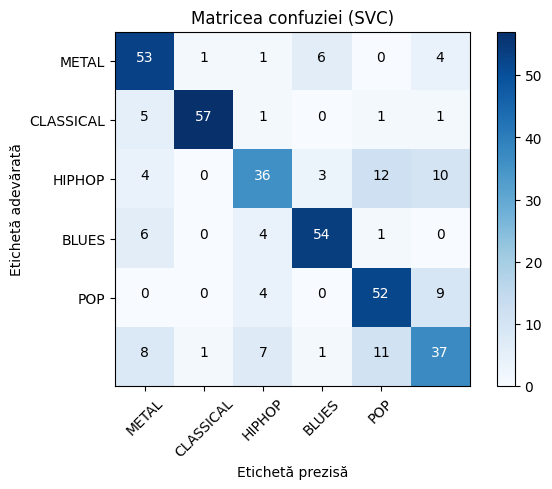

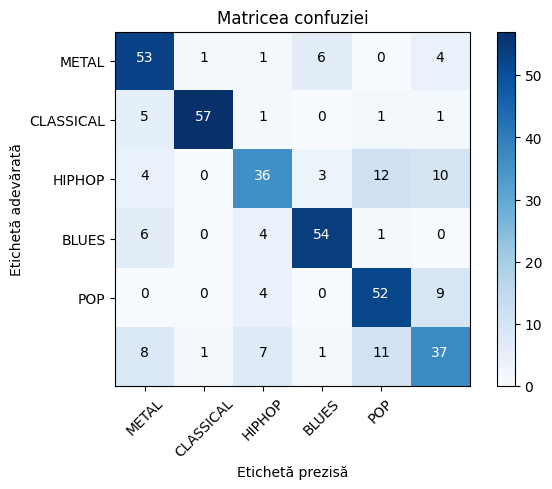

In [ ]:
# Definim modelul SVC - 
svc_model = SVC(kernel='linear', random_state=42)

# Antrenăm modelul folosind setul de date de antrenament
svc_model.fit(train_x, train_y)

# Evaluăm performanța modelului folosind setul de date de testare
score = svc_model.score(test_x, test_y)
print("Performanța modelului SVC pe setul de testare: {:.2f}%".format(score * 100))

# Generăm predicții pentru setul de date de testare
svc_predictions = svc_model.predict(test_x)

# Generăm matricea de confuzie și afișăm grafic matricea
cnf_matrix = sklearn.metrics.confusion_matrix(test_y, svc_predictions)
plt.figure()
confusion_matrix(cnf_matrix, classes=GENRES, title='Matricea confuziei (SVC)')

# Afișăm raportul de clasificare
print(sklearn.metrics.classification_report(test_y, svc_predictions))

#Se apeleaza o functie numita plot_cnf() si afiseaza o matrice de confuzie pentru a evalua performanta modelului.
plot_cnf(svc_model,test_x,test_y,GENRES) 

#Acest cod defineste un obiect svc_model care utilizează un kernel liniar și apoi antrenează acest model folosind setul de date de antrenament train_x și train_y.
#Modelul este evaluat pe setul de date de testare test_x și test_y folosind metoda score(), care calculează acuratețea clasificării.
# De asemenea, se generează predicții pentru setul de date de testare folosind metoda predict().
# Mai departe, matricea de confuzie este generată și afișată grafic cu ajutorul funcției confusion_matrix(),
# iar raportul de clasificare este afișat cu ajutorul funcției classification_report().

Max Accuracy is 0.710 on test dataset with 10 estimators.

Training Score: 0.990
Test score: 0.710
---------------ANALIZA PERFORMANȚEI PENTRU MODEL----------------

Etichetele setului de date Real Test: 
['hiphop' 'pop' 'metal' 'metal' 'blues' 'classical' 'hiphop' 'hiphop'
 'classical' 'pop' 'classical' 'metal' 'metal' 'reggae' 'pop' 'hiphop'
 'hiphop' 'pop' 'pop' 'pop' 'classical' 'blues' 'classical' 'classical'
 'metal' 'pop' 'metal' 'classical' 'reggae' 'pop' 'reggae' 'blues'
 'hiphop' 'hiphop' 'pop' 'reggae' 'reggae' 'blues' 'pop' 'pop' 'hiphop'
 'classical' 'hiphop' 'reggae' 'hiphop' 'classical' 'classical' 'hiphop'
 'classical' 'pop' 'pop' 'pop' 'metal' 'blues' 'hiphop' 'classical'
 'hiphop' 'hiphop' 'reggae' 'classical' 'reggae' 'hiphop' 'classical'
 'pop' 'metal' 'hiphop' 'hiphop' 'metal' 'reggae' 'classical' 'reggae'
 'blues' 'reggae' 'reggae' 'reggae' 'hiphop' 'reggae' 'metal' 'reggae'
 'metal' 'blues' 'metal' 'hiphop' 'blues' 'hiphop' 'pop' 'reggae'
 'classical' 'reggae' 're

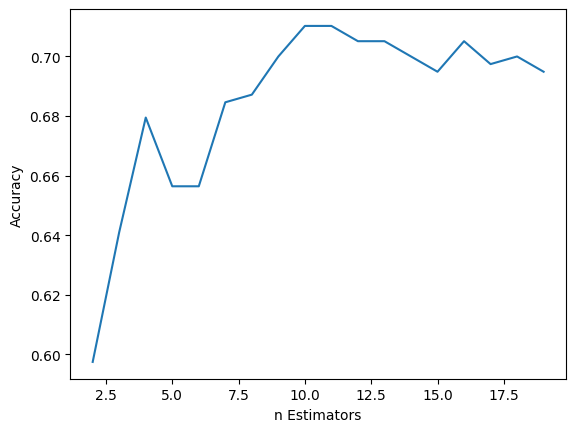

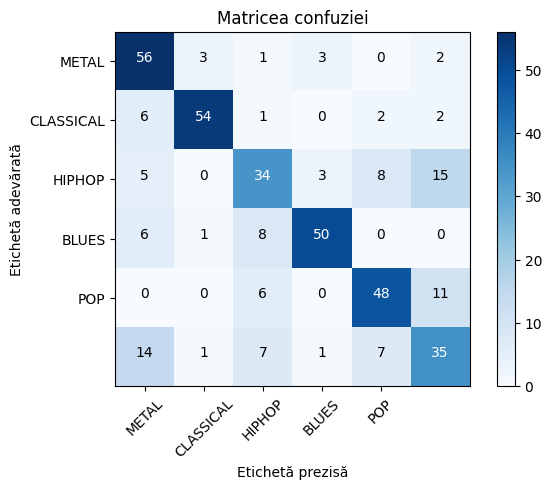

In [ ]:
#Algoritmul Random Forest

results_forest=[]  #listă goală care va conține scorurile obținute de modelul Random Forest pentru diferite valori ale n_estimators.
for i in range(2,20):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)  #antrenează modelul Random Forest pe setul de antrenament (train_x și train_y).
    results_forest.append(forest.score(test_x,test_y)) # calculeaz scorul modelului pe setul de test (test_x și test_y) și adaug scorul la lista results_forest.
    
max_accuracy_forest=max(results_forest)  #Calculeaz cel mai mare scor obținut de modelul Random Forest pe setul de test și îl stochează în variabila max_accuracy_forest.
best_n_est=2+results_forest.index(max(results_forest))  #Determin numărul optim de arbori (n_estimators) pentru modelul Random Forest prin căutarea indexului scorului maxim din lista results_forest și adăugarea valorii 2
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(2,20),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est) #creeaz un nou obiect de tipul RandomForestClassifier cu un generator de numere aleatoare setat la 42 și numărul de arbori (n_estimators) setat la numărul optim determinat anterior.
forest.fit(train_x,train_y)  #antreneaz modelul Random Forest pe setul de antrenament 
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,GENRES)

Training Score: 0.714
Test score: 0.644
---------------ANALIZA PERFORMANȚEI PENTRU MODEL----------------

Etichetele setului de date Real Test: 
['hiphop' 'pop' 'metal' 'metal' 'blues' 'classical' 'hiphop' 'hiphop'
 'classical' 'pop' 'classical' 'metal' 'metal' 'reggae' 'pop' 'hiphop'
 'hiphop' 'pop' 'pop' 'pop' 'classical' 'blues' 'classical' 'classical'
 'metal' 'pop' 'metal' 'classical' 'reggae' 'pop' 'reggae' 'blues'
 'hiphop' 'hiphop' 'pop' 'reggae' 'reggae' 'blues' 'pop' 'pop' 'hiphop'
 'classical' 'hiphop' 'reggae' 'hiphop' 'classical' 'classical' 'hiphop'
 'classical' 'pop' 'pop' 'pop' 'metal' 'blues' 'hiphop' 'classical'
 'hiphop' 'hiphop' 'reggae' 'classical' 'reggae' 'hiphop' 'classical'
 'pop' 'metal' 'hiphop' 'hiphop' 'metal' 'reggae' 'classical' 'reggae'
 'blues' 'reggae' 'reggae' 'reggae' 'hiphop' 'reggae' 'metal' 'reggae'
 'metal' 'blues' 'metal' 'hiphop' 'blues' 'hiphop' 'pop' 'reggae'
 'classical' 'reggae' 'reggae' 'pop' 'reggae' 'hiphop' 'hiphop' 'blues'
 'classical'

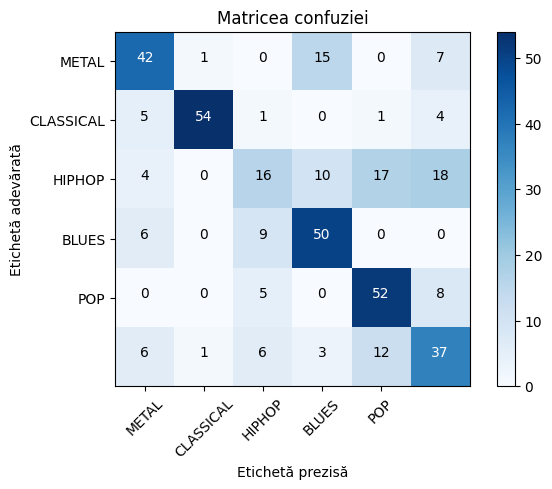

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initializarea si antrenarea clasificatorului
gnb = GaussianNB()
gnb.fit(train_x, train_y)

# Evaluarea performantei pe setul de test
print("Training Score: {:.3f}".format(gnb.score(train_x, train_y)))
print("Test score: {:.3f}".format(gnb.score(test_x, test_y)))


# Vizualizarea matricei de confuzie
plot_cnf(gnb, test_x, test_y, GENRES)
